# Develidağ Spider

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
dataset_raw = pd.read_excel("../spiderman.xlsx")
dataset_raw.columns = ["Elements"] + list(dataset_raw.columns[1:])
dataset_raw

,Elements,D2004-1,D2004-3,D2004-4,D2004-5,D2004-7,D2004-8,D2004-10,D2004-11,D2004-12,D2004-13
0,Li,6.981905,7.604960,13.166420,12.476075,6.239455,8.945040,8.785485,7.997385,7.522640,9.126875
1,Be,1.802075,1.656020,1.056855,1.359370,1.147730,1.028400,1.429520,1.365365,0.963280,1.257230
2,B,2.431930,4.098075,9.913155,13.500850,6.332455,6.489980,3.115865,1.776130,9.873985,14.658575
3,Sc,25.002060,24.450350,15.382670,17.962315,20.299850,20.529390,26.499220,25.565280,20.566065,11.783625
4,V,179.875270,166.235005,153.705135,147.143180,162.317765,185.778195,186.700605,178.025530,202.527550,109.894250
5,Cr,70.898830,67.648045,6.042435,90.717425,60.755680,25.287195,129.698135,126.063300,22.644440,19.506390
6,Co,56.724675,61.471850,30.515855,41.264085,113.848110,43.776680,59.724915,63.111060,46.477565,40.318430
7,Ni,86.145900,84.112970,0.000000,32.610200,19.606290,6.974190,113.699310,110.376400,15.395985,5.209340
8,Cu,38.920940,57.605295,14.230070,40.398300,33.403920,36.730165,64.492160,55.354105,48.073420,17.639725
9,Zn,112.215845,84.940745,57.225095,61.446435,73.109290,61.682780,76.389350,77.283280,72.055990,68.198515


In [197]:
sample_names = pd.read_excel("../spiderman.xlsx", index_col=0, header=None)
name_row = sample_names.iloc[0,:].reset_index(drop=True)
name_row

0     D2004-1
1     D2004-3
2     D2004-4
3     D2004-5
4     D2004-7
5     D2004-8
6    D2004-10
7    D2004-11
8    D2004-12
9    D2004-13
Name: Sample, dtype: object

In [198]:
spdr_elements = [
    "Cs", "Rb", "Ba", "Th", "U", "Nb", "Ta", "K", 
    "La", "Ce", "Pb", "Sr", "P", "Nd", "Sm", "Zr", 
    "Hf", "Eu", "Ti", "Tb", "Y", "Yb", "Lu"
]

In [200]:
dataset = dataset_raw[dataset_raw["Elements"].isin(spdr_elements)]
dataset = dataset.set_index("Elements")
dataset = dataset.reindex(spdr_elements)
dataset = dataset.reset_index()
dataset

,Elements,D2004-1,D2004-3,D2004-4,D2004-5,D2004-7,D2004-8,D2004-10,D2004-11,D2004-12,D2004-13
0,Cs,0.093680,0.073915,0.682105,1.484755,0.700185,0.295660,0.049265,0.034095,0.355615,1.095830
1,Rb,6.803890,6.166275,36.393375,54.671030,21.738350,17.638120,4.654470,4.931115,11.973755,34.584485
2,Ba,170.615035,301.968910,559.878160,976.076615,423.303250,479.836395,366.469610,189.004425,1528.539135,550.949090
3,Th,1.267790,1.160950,6.256175,9.636610,4.731845,3.268455,1.515110,1.511540,2.626995,6.394580
4,U,0.404515,0.364225,1.662645,2.640440,1.187290,0.898820,0.348515,0.321695,0.687750,1.535115
5,Nb,12.786315,11.888055,7.548250,10.700565,7.579300,6.687820,8.780575,8.593975,7.433585,9.551550
6,Ta,0.902885,0.942670,0.654720,0.867125,0.889045,0.578760,0.812960,0.726360,0.624090,0.947995
7,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,La,18.327615,17.425320,19.289305,24.634895,16.347460,16.006740,13.954415,13.863730,13.959870,21.776170
9,Ce,41.838395,39.723240,34.404905,42.784250,32.665725,30.861515,31.542975,31.338910,30.010785,42.206800


In [201]:
reference = pd.read_excel("../reference.xlsx")
reference

,Elements,Primitive Mantle,OIB values,OIB
0,Cs,0.0079,0.387,48.987342
1,Rb,0.6350,31.000,48.818898
2,Ba,6.9890,350.000,50.078695
3,Th,0.0850,4.000,47.058824
4,U,0.0210,1.020,48.571429
5,Nb,0.7130,48.000,67.321178
6,Ta,0.0410,2.700,65.853659
7,K,0.0300,1.445,48.166667
8,La,0.6870,37.000,53.857351
9,Ce,1.7750,80.000,45.070423


In [202]:
normalised_dataset = []

for i in range(1, dataset.columns.size):
    calculated = dataset.iloc[:, i] / reference["Primitive Mantle"]
    normalised_dataset.append(calculated)

In [203]:
normalised_df = pd.DataFrame(normalised_dataset).transpose()
normalised_df

,0,1,2,3,4,5,6,7,8,9
0,11.858228,9.356329,86.342405,187.943671,88.631013,37.425316,6.236076,4.315823,45.014557,138.712658
1,10.714787,9.710669,57.312402,86.096110,34.233622,27.776567,7.329874,7.765535,18.856307,54.463756
2,24.411938,43.206311,80.108479,139.658981,60.567070,68.655944,52.435200,27.043128,218.706415,78.830890
3,14.915176,13.658235,73.602059,113.371882,55.668765,38.452412,17.824824,17.782824,30.905824,75.230353
4,19.262619,17.344048,79.173571,125.735238,56.537619,42.800952,16.595952,15.318810,32.750000,73.100714
5,17.933121,16.673289,10.586606,15.007805,10.630154,9.379832,12.314972,12.053261,10.425785,13.396283
6,22.021585,22.991951,15.968780,21.149390,21.684024,14.116098,19.828293,17.716098,15.221707,23.121829
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,26.677751,25.364367,28.077591,35.858654,23.795429,23.299476,20.312103,20.180102,20.320044,31.697482
9,23.570927,22.379290,19.383045,24.103803,18.403225,17.386769,17.770690,17.655724,16.907485,23.778479


In [206]:
reference

,Elements,Primitive Mantle,OIB values,OIB
0,Cs,0.0079,0.387,48.987342
1,Rb,0.6350,31.000,48.818898
2,Ba,6.9890,350.000,50.078695
3,Th,0.0850,4.000,47.058824
4,U,0.0210,1.020,48.571429
5,Nb,0.7130,48.000,67.321178
6,Ta,0.0410,2.700,65.853659
7,K,0.0300,1.445,48.166667
8,La,0.6870,37.000,53.857351
9,Ce,1.7750,80.000,45.070423


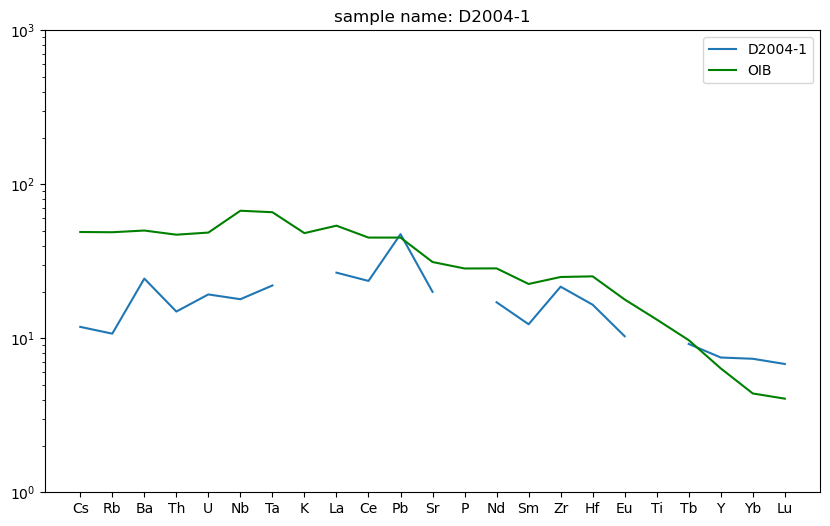

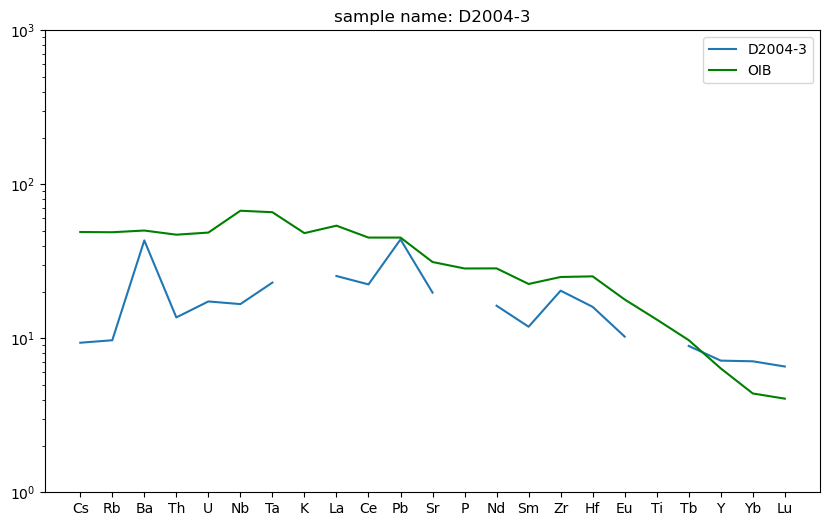

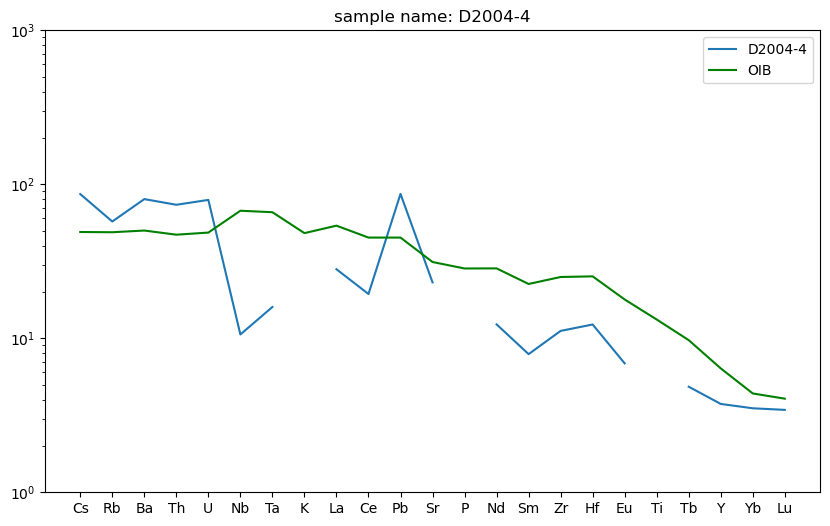

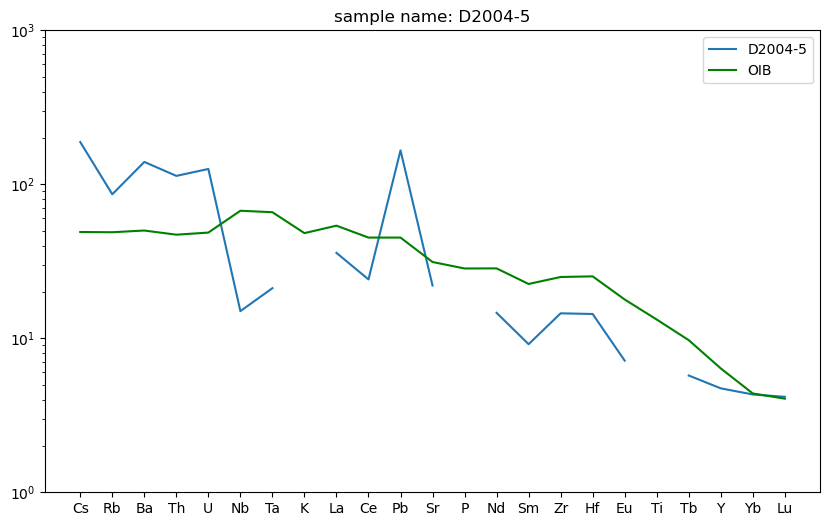

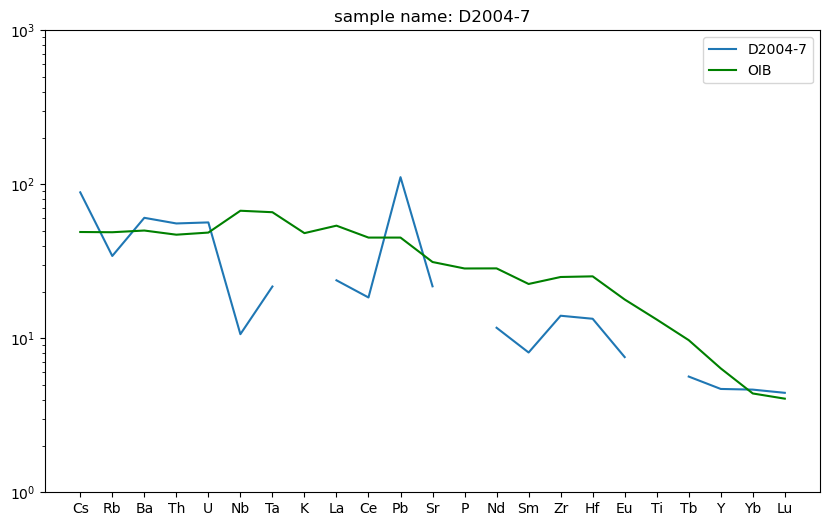

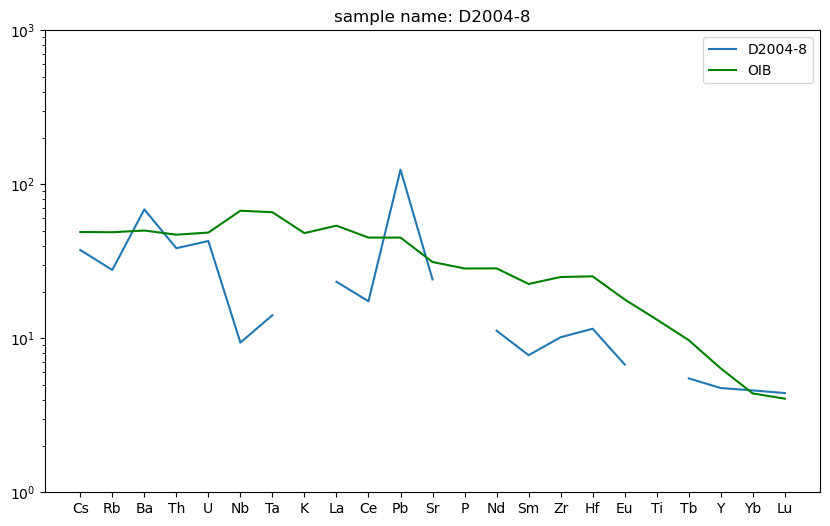

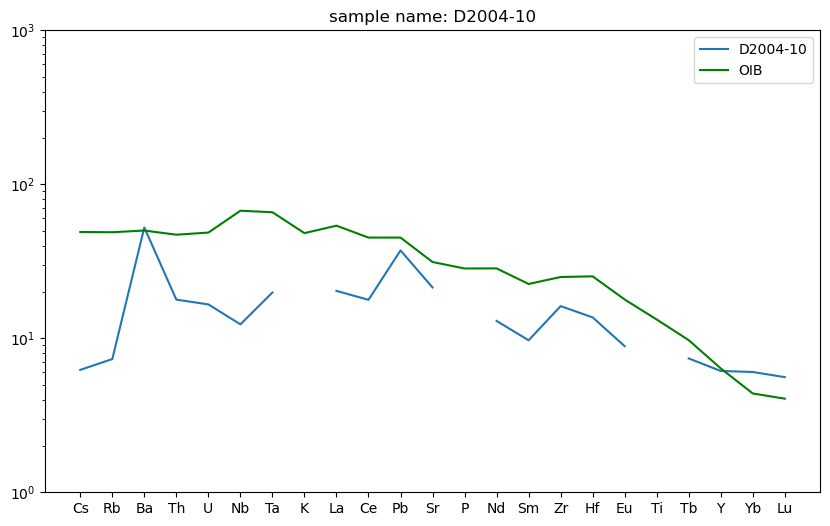

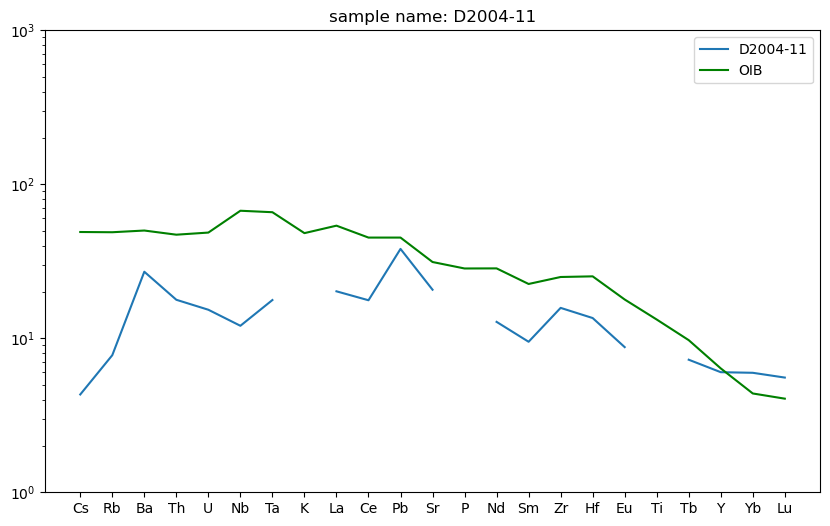

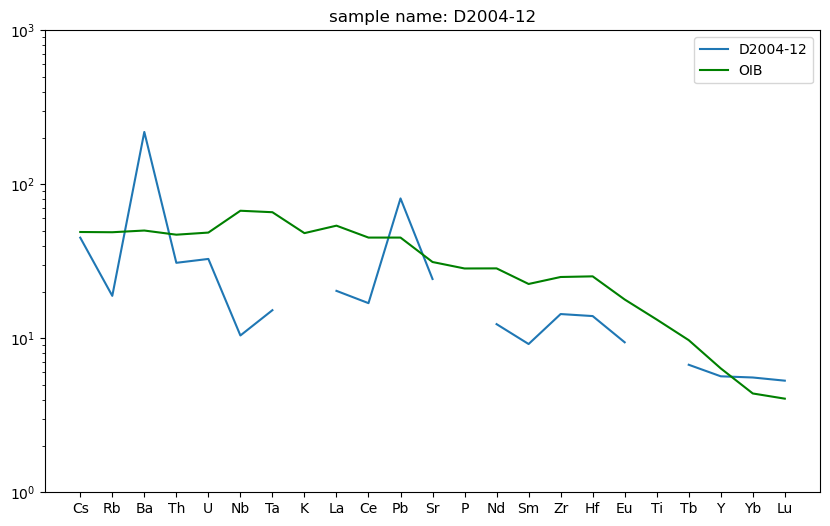

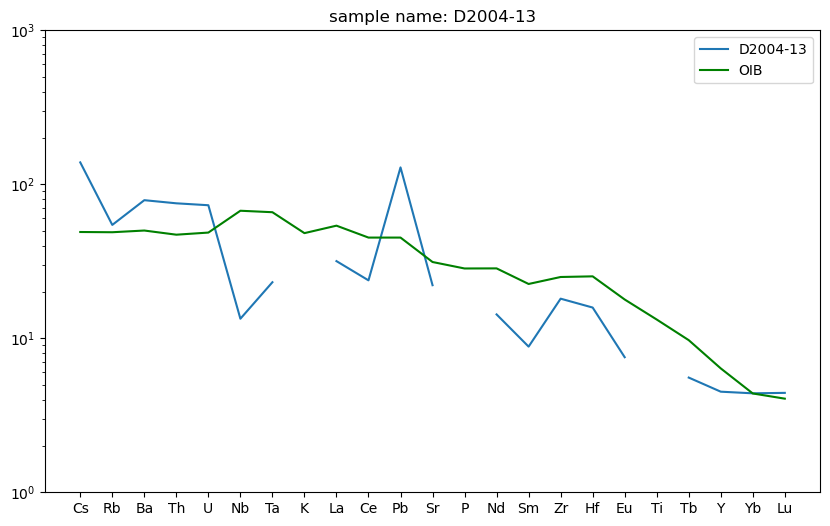

In [207]:
for i in range(normalised_df.columns.size):
    plt.figure(figsize=(10,6))
    plt.plot(dataset["Elements"], normalised_df[i], label=f"{name_row[i]}")
    plt.plot(dataset["Elements"], reference["OIB"], color="green", label="OIB") #OIB
    plt.title(f"sample name: {name_row[i]}")
    plt.yscale('log')
    plt.ylim(1e0,1e3)
    plt.legend()
    plt.show()